# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
#browser = Browser('chrome')
service = Service(ChromeDriverManager().install())
browser = Browser('chrome', service=service)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
data_table = soup.find('table', class_='table')
data_table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
weatherLst = []

# Loop through the scraped data to create a list of rows
weatherTbl = data_table.find_all('th')

for header_element in weatherTbl:
    title = header_element.text
    weatherLst.append(title)

weatherTbl = [th.text.strip() for th in data_table.find_all('th')]

weatherTbl

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
weather_df = pd.DataFrame(columns=weatherTbl)

for row in data_table.find_all('tr', class_='data-row'):
    data = row.find_all('td')
    row_data = [td.text.strip() for td in data]

    
    weather_df.loc[len(weather_df)] = row_data  

In [8]:
# Confirm DataFrame was created successfully
weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
weather_df['id'] = weather_df['id'].astype(int)
weather_df['terrestrial_date'] = pd.to_datetime(weather_df['terrestrial_date'])
weather_df['sol'] = weather_df['sol'].astype(int)
weather_df['month'] = weather_df['month'].astype(int)
weather_df['min_temp'] = weather_df['min_temp'].astype(float)
weather_df['pressure'] = weather_df['pressure'].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
weather_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                          object
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
months = weather_df['month'].nunique()
months

12

In [13]:
# 2. How many sols (Martian days) worth of data are there?
sols = weather_df.shape[0]
sols

1867

In [14]:
# 3. What is the average minimum temperature by month?
weather_df['month'] = weather_df['terrestrial_date'].dt.month
min_temp_by_month = weather_df.groupby('month')['min_temp'].min().reset_index()
print(min_temp_by_month)

    month  min_temp
0       1     -89.0
1       2     -88.0
2       3     -87.0
3       4     -85.0
4       5     -84.0
5       6     -84.0
6       7     -80.0
7       8     -82.0
8       9     -84.0
9      10     -87.0
10     11     -89.0
11     12     -90.0


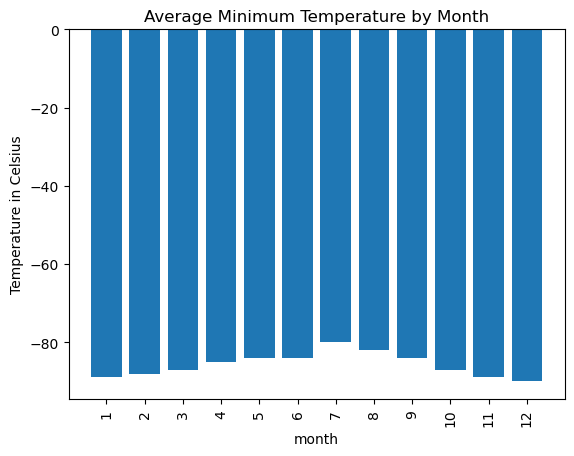

In [15]:
# Plot the average minimum temperature by month
x_axis = min_temp_by_month['month']
y_axis = min_temp_by_month['min_temp']

plt.bar(x_axis, y_axis)
plt.title('Average Minimum Temperature by Month')
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.xticks(x_axis, rotation=90)
plt.show()

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
min_temp_by_month_sorted = min_temp_by_month.sort_values('min_temp').reset_index()
min_temp_by_month_sorted

,index,month,min_temp
0,11,12,-90.0
1,0,1,-89.0
2,10,11,-89.0
3,1,2,-88.0
4,2,3,-87.0
5,9,10,-87.0
6,3,4,-85.0
7,4,5,-84.0
8,5,6,-84.0
9,8,9,-84.0


In [17]:
# 4. What is the average pressure by month?
avg_pressure_by_month = weather_df.groupby('month')['pressure'].mean().reset_index()
print(avg_pressure_by_month)

    month    pressure
0       1  861.258621
1       2  837.967532
2       3  827.722222
3       4  817.676056
4       5  803.601399
5       6  807.910959
6       7  822.510638
7       8  829.606452
8       9  845.586207
9      10  865.475138
10     11  875.481013
11     12  875.260116


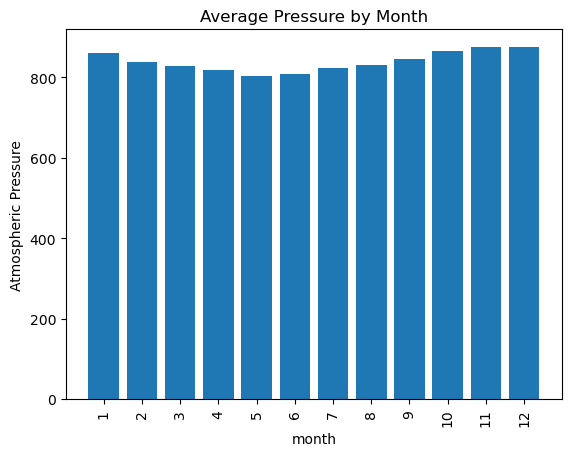

In [18]:
# Plot the average pressure by month
x_axis = avg_pressure_by_month['month']
y_axis = avg_pressure_by_month['pressure']

plt.bar(x_axis, y_axis)
plt.title('Average Pressure by Month')
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(x_axis, rotation=90)
plt.show()

In [20]:
pressure_by_month_sorted = avg_pressure_by_month.sort_values('pressure').reset_index()
pressure_by_month_sorted

,index,month,pressure
0,4,5,803.601399
1,5,6,807.910959
2,3,4,817.676056
3,6,7,822.510638
4,2,3,827.722222
5,7,8,829.606452
6,1,2,837.967532
7,8,9,845.586207
8,0,1,861.258621
9,9,10,865.475138


The month with the lowest pressure is 5.
The month with the highest pressure is 11.


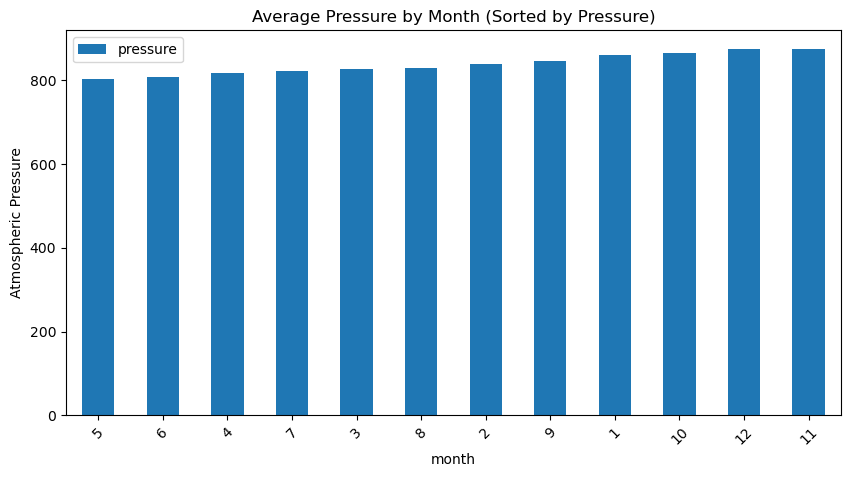

In [21]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
min_pressure_row = pressure_by_month_sorted.loc[pressure_by_month_sorted['pressure'].idxmin()].astype(int)
max_pressure_row = pressure_by_month_sorted.loc[pressure_by_month_sorted['pressure'].idxmax()].astype(int)

# Print the coldest and hottest months
print(f"The month with the lowest pressure is {min_pressure_row['month']}.")
print(f"The month with the highest pressure is {max_pressure_row['month']}.")

# Create bar chart plot
pressure_by_month_sorted.plot(x='month', y='pressure', kind='bar', figsize=(10, 5), rot=45)
plt.title('Average Pressure by Month (Sorted by Pressure)')
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.show()

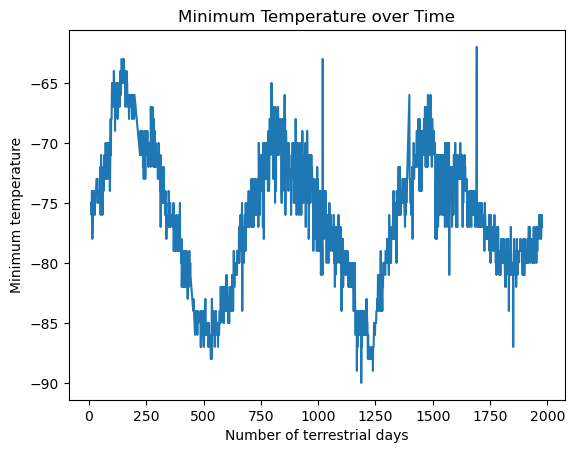

In [22]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.plot(weather_df['sol'], weather_df['min_temp'])
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.title('Minimum Temperature over Time')
plt.show()

#### Minimum Temperature

YOUR ANALYSIS HERE

#### Atmospheric Pressure

YOUR ANALYSIS HERE

#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [23]:
# Write the data to a CSV
weather_df.to_csv('mars_weather_data.csv',  encoding='utf8', index=False)

In [24]:
browser.quit()